In [971]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #this library provides more statistical visualization
import plotly.express as px #for interactive visualizations can esily plot complex data 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode #provide wide range of statistical functions
from datetime import datetime

In [972]:
# loading the data sets
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_data_or = train_data.copy()
test_data_or = test_data.copy()


In [973]:

train_data


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [974]:
test_data

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


In [975]:
train_data.shape

(150150, 9)

In [976]:
test_data.shape

(13860, 8)

In [977]:
 train_data.isnull().sum()
    
    

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [978]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [979]:
 test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [980]:
 test_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [981]:
#there is no null values in the test_data but there is a null value in the train_data
train_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

# Missing value treatment

In [982]:
#finding the nature of the missing data
train_data[train_data['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [983]:
print('mean value of the total price for 1 units sold is: ',train_data['total_price'][train_data['units_sold']==1].mean())

mean value of the total price for 1 units sold is:  291.72627737226435


In [984]:
#treating missing value with the mean of total price 
train_data["total_price"] = train_data["total_price"].fillna(train_data["total_price"][train_data["units_sold"]==1].mean())
train_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [985]:
train_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [986]:
train_data.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

no more missing values present in the train data 


# feature creation


creating week_number,month,year features from date


In [987]:
train_data['date']=pd.to_datetime(train_data['week']) #creating a column named date from week feature

In [988]:
train_data.drop(['week'], axis = 1, inplace =True)  #droping week feature

In [989]:
train_data["week_number"] = train_data['date'].dt.week #adding a new column week_number based on date

In [990]:
train_data.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,week_number
0,1,8091,216418,99.0375,111.8625,0,0,20,2011-01-17,3
1,2,8091,216419,99.0375,99.0375,0,0,28,2011-01-17,3
2,3,8091,216425,133.9500,133.9500,0,0,19,2011-01-17,3
3,4,8091,216233,133.9500,133.9500,0,0,44,2011-01-17,3
4,5,8091,217390,141.0750,141.0750,0,0,52,2011-01-17,3


In [991]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   store_id         150150 non-null  int64         
 2   sku_id           150150 non-null  int64         
 3   total_price      150150 non-null  float64       
 4   base_price       150150 non-null  float64       
 5   is_featured_sku  150150 non-null  int64         
 6   is_display_sku   150150 non-null  int64         
 7   units_sold       150150 non-null  int64         
 8   date             150150 non-null  datetime64[ns]
 9   week_number      150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 11.5 MB


we can see store_id,sku_id are catagorical features but their datatype is int64 thus we change catagorical features to str

In [992]:
train_data['store_id']=train_data['store_id'].astype('str')
train_data['sku_id']=train_data['sku_id'].astype('str')

record_id is a unique identification id for each entry in data set and it is not required in model building,thus drop the record_ID

In [993]:
train_data.drop(columns=['record_ID','date'],axis=1,inplace=True)

In [994]:
train_data.nunique()# gives count of unique values

store_id            76
sku_id              28
total_price        647
base_price         572
is_featured_sku      2
is_display_sku       2
units_sold         708
week_number         51
dtype: int64

In [995]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         150150 non-null  object 
 1   sku_id           150150 non-null  object 
 2   total_price      150150 non-null  float64
 3   base_price       150150 non-null  float64
 4   is_featured_sku  150150 non-null  int64  
 5   is_display_sku   150150 non-null  int64  
 6   units_sold       150150 non-null  int64  
 7   week_number      150150 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 9.2+ MB


making the changes in test data as well

In [996]:
test_data.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [997]:
test_data['date']=pd.to_datetime(test_data['week'])#creating a column named date from week feature
test_data.drop(['week'],axis=1,inplace=True)
test_data['week_number']=test_data['date'].dt.week


In [998]:
test_data['store_id']=test_data['store_id'].astype('str')
test_data['sku_id']=test_data['sku_id'].astype('str')
test_data.drop(columns=['record_ID','date'],axis=1,inplace=True)

In [999]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         13860 non-null  object 
 1   sku_id           13860 non-null  object 
 2   total_price      13860 non-null  float64
 3   base_price       13860 non-null  float64
 4   is_featured_sku  13860 non-null  int64  
 5   is_display_sku   13860 non-null  int64  
 6   week_number      13860 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 758.1+ KB


In [1000]:
test_data.nunique()

store_id            76
sku_id              28
total_price        442
base_price         370
is_featured_sku      2
is_display_sku       2
week_number         12
dtype: int64

# outlier treatment

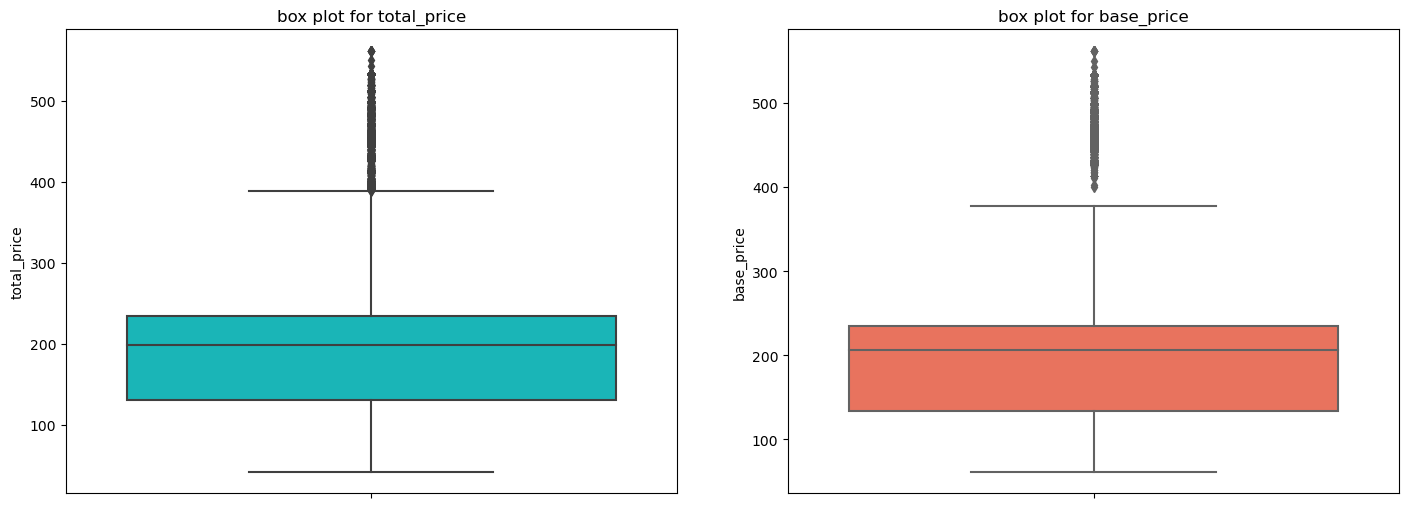

In [1001]:
#ploting box plot for total_price and base_price features from train data
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)#to compare two plots,creates subplot grid in a manner of one row two column 
sns.boxplot(y=train_data['total_price'],color='darkturquoise')
plt.title('box plot for total_price')

plt.subplot(1,2,2)
sns.boxplot(y=train_data['base_price'],color='tomato')
plt.title('box plot for base_price')
plt.tight_layout(pad=4) #improve spacing of subplots ie padding bw subplots and edge of figure
plt.show()



lot of outliers can be seen in the total_price and base_price

treating the outliers by IQR(inter quartile range)method

In [1002]:
q1=train_data['total_price'].quantile(.25)
q3=train_data["total_price"].quantile(.75)
iqr = q3-q1
print(q1)
print(q3)
print(iqr)

130.3875
233.7
103.3125


In [1003]:
lf_tp=q1-(1.5*iqr)
print('lower fence of total price is:',lf_tp)
uf_tp=q3+(1.5*iqr)
print('upper fence of total price is: ',uf_tp)

lower fence of total price is: -24.58125000000001
upper fence of total price is:  388.66875


In [1004]:
Q1=train_data['base_price'].quantile(.25)
Q3=train_data["base_price"].quantile(.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

133.2375
234.4125
101.17499999999998


In [1005]:
lf_bp=Q1-(1.5*IQR)
print('lower fence of base price is:',lf_bp)
uf_bp=Q3+(1.5*IQR)
print('upper fence of base price is: ',uf_bp)

lower fence of base price is: -18.524999999999977
upper fence of base price is:  386.17499999999995


In [1006]:
#since the total price and base price cant be negative thus taking lower fence value both as 0
train_data1=train_data.loc[(train_data['total_price']>0)&(train_data['total_price']<uf_tp)&(train_data['base_price']>0)&(train_data['base_price']<uf_bp)]
train_data1.reset_index(inplace=True,drop=True)
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         133027 non-null  object 
 1   sku_id           133027 non-null  object 
 2   total_price      133027 non-null  float64
 3   base_price       133027 non-null  float64
 4   is_featured_sku  133027 non-null  int64  
 5   is_display_sku   133027 non-null  int64  
 6   units_sold       133027 non-null  int64  
 7   week_number      133027 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.1+ MB


In [1007]:
train_data1['total_price'][train_data['total_price']==0].count()

0

In [1008]:
train_data1['base_price'][train_data['base_price']==0].count()

0

After outlier treatment 133027 rows are present in the features of train data with 0 null values.

In [1009]:
#group by the data by store_id column and calculate the sum of the units sold column
units_sold_by_store=train_data1.groupby('store_id')['units_sold'].sum() 

units_sold_by_store_sorted=units_sold_by_store.sort_values(ascending=False) #sorting the data in descending order by sum of units sold

#select the top 10 store_ids
top_10_stores=units_sold_by_store_sorted.head(10).index

#replace the store_ids with 1 and rest with 0
train_data1['store_id']=train_data1['store_id'].apply(lambda x: 1 if x in top_10_stores else 0)

#displaying the resulting data frame
train_data1.head()




,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,216418,99.0375,111.8625,0,0,20,3
1,0,216419,99.0375,99.0375,0,0,28,3
2,0,216425,133.9500,133.9500,0,0,19,3
3,0,216233,133.9500,133.9500,0,0,44,3
4,0,217390,141.0750,141.0750,0,0,52,3


In [1010]:
# Group the data by the 'sku_id' column and calculate the sum of the 'units_sold' column
units_sold_by_sku = train_data1.groupby('sku_id')['units_sold'].sum()

# Sort the data in descending order by the sum of units sold
units_sold_by_sku_sorted = units_sold_by_sku.sort_values(ascending=False)

# Select the top 3 sku's
top_3_sku = units_sold_by_sku_sorted.head(3).index

# Replace the sku_id's with 1 and rest with 0
train_data1['sku_id'] = train_data1['sku_id'].apply(lambda x: 1 if x in top_3_sku else 0)

# Display the resulting dataframe
train_data1.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,111.8625,0,0,20,3
1,0,0,99.0375,99.0375,0,0,28,3
2,0,0,133.9500,133.9500,0,0,19,3
3,0,0,133.9500,133.9500,0,0,44,3
4,0,0,141.0750,141.0750,0,0,52,3


In [1011]:
test_data1=test_data.copy()

In [1012]:
top_10_stores

Index(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250',
       '9481'],
      dtype='object', name='store_id')

In [1013]:
top_3_sku

Index(['219009', '216418', '223245'], dtype='object', name='sku_id')

In [1014]:
#modifying the values in test_data1 store_id column by negation operator
test_data1.loc[~test_data1['store_id'].isin(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250','9481']),'store_id']=0

In [1015]:
test_data1.loc[test_data1['store_id'].isin(['8023', '9845', '9823', '9112', '9613', '8222', '8095', '9611', '9250','9481']), 'store_id'] = 1

In [1016]:
test_data1.loc[~test_data1['sku_id'].isin(['219009', '216418', '223245']), 'sku_id'] = 0

In [1017]:
test_data1.loc[test_data1['sku_id'].isin(['219009', '216418', '223245']), 'sku_id'] = 1

# Nominal Encoding

In [1018]:
from sklearn.preprocessing import LabelEncoder

In [1019]:
le=LabelEncoder()

In [1020]:
train_data1['week_number']=le.fit_transform(train_data1['week_number']) #encode the week number catagorical to numeric

In [1021]:
En_train_data=train_data1.copy()

In [1022]:
test_data['week_number']=le.fit_transform(test_data['week_number'])

In [1023]:
En_test_data=test_data1.copy()

In [1024]:
En_train_data.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,111.8625,0,0,20,1
1,0,0,99.0375,99.0375,0,0,28,1
2,0,0,133.9500,133.9500,0,0,19,1
3,0,0,133.9500,133.9500,0,0,44,1
4,0,0,141.0750,141.0750,0,0,52,1


In [1025]:
print(En_train_data.shape)
print(En_test_data.shape)

(133027, 8)
(13860, 7)


now the number of features in both test and train data are the same except units sold to be predicted in test data

In [1026]:
En_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         133027 non-null  int64  
 1   sku_id           133027 non-null  int64  
 2   total_price      133027 non-null  float64
 3   base_price       133027 non-null  float64
 4   is_featured_sku  133027 non-null  int64  
 5   is_display_sku   133027 non-null  int64  
 6   units_sold       133027 non-null  int64  
 7   week_number      133027 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 8.1 MB


# feature selection

In [1027]:
En_train_data.head() #selecting the data of important features to build the model

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,111.8625,0,0,20,1
1,0,0,99.0375,99.0375,0,0,28,1
2,0,0,133.9500,133.9500,0,0,19,1
3,0,0,133.9500,133.9500,0,0,44,1
4,0,0,141.0750,141.0750,0,0,52,1


# correlation

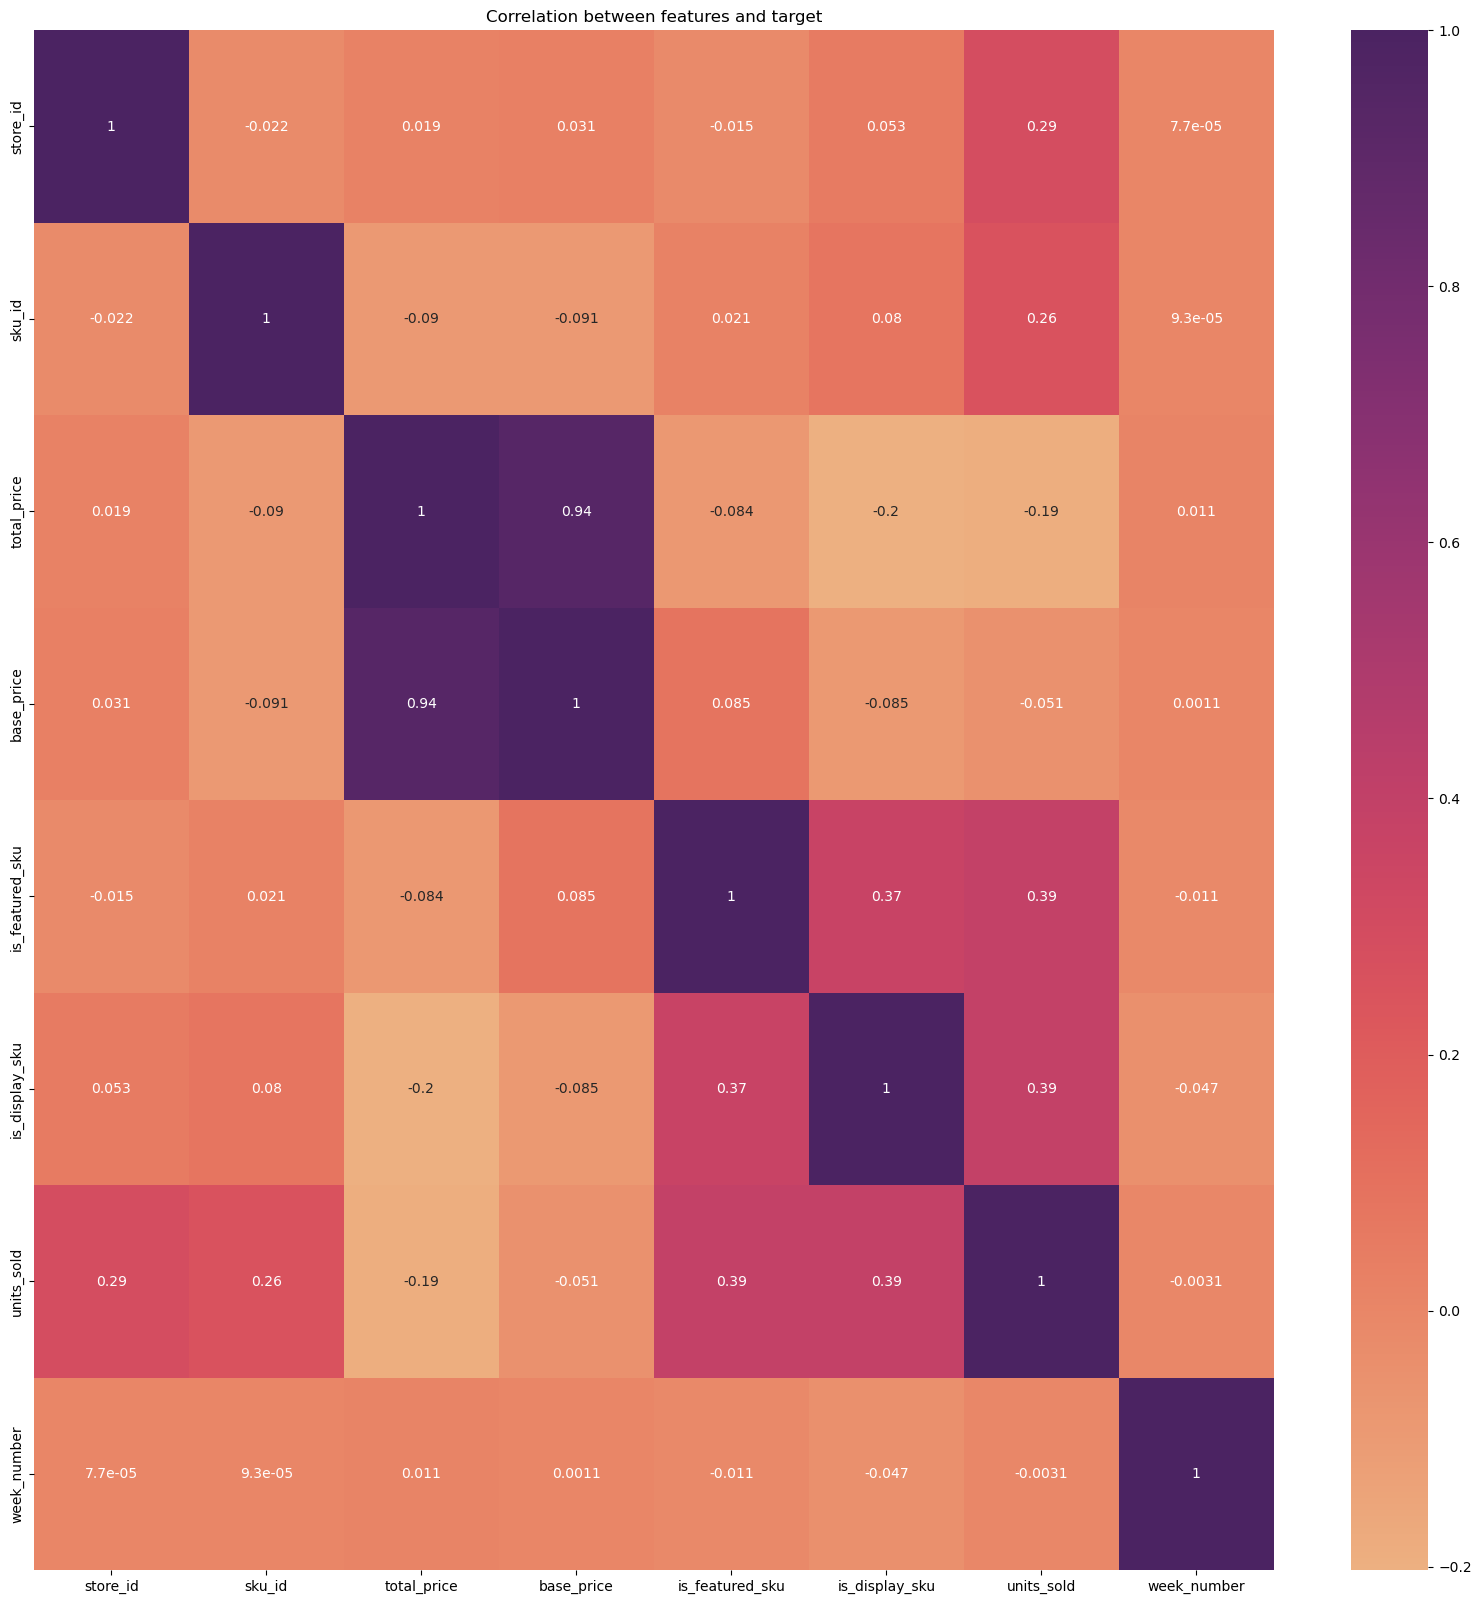

In [1028]:
#stataistical measure that describing the relation of two features
# heat map of correlation matrix for En_train_data

plt.figure(figsize = (20,20))
plt.title("Correlation between features and target")
sns.heatmap(En_train_data.corr(), annot = True, cmap = 'flare')

plt.show()

In [1029]:
corr=En_train_data.iloc[:,:].corr() # selects all the row and column in En_train_data for calculation of correlation coefiicient
name_features=corr.index


In [1030]:
abs(corr['units_sold'])#gives absolute value of corr coefficient

store_id           0.287126
sku_id             0.255344
total_price        0.189147
base_price         0.051454
is_featured_sku    0.393627
is_display_sku     0.392092
units_sold         1.000000
week_number        0.003090
Name: units_sold, dtype: float64

there is a correlation between units sold and other features

# Remove correlated independent features( multi collinearity)

In [1031]:
#presense of highly correlated multi features can lead to unstable estimations.
#difficult to determine individual effects.
threshold=0.5 #value to find which feature is highly correlated



In [1032]:
corr_matrix=En_train_data.corr()

In [1033]:
corr_matrix.columns

Index(['store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku',
       'is_display_sku', 'units_sold', 'week_number'],
      dtype='object')

In [1034]:
df_new=En_train_data.drop(['units_sold'],axis=1)

In [1035]:
#find and remove correlated features
def multi_coli(dataset,threshold):
    col_corr=set() #set of all the name sof correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
    


In [1036]:
multi_coli(df_new,0.5)

{'base_price'}

In [1037]:
df_train_final=En_train_data.drop(['base_price'],axis=1)

In [1038]:
df_train_final.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,0,0,20,1
1,0,0,99.0375,0,0,28,1
2,0,0,133.9500,0,0,19,1
3,0,0,133.9500,0,0,44,1
4,0,0,141.0750,0,0,52,1


In [1039]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133027 entries, 0 to 133026
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         133027 non-null  int64  
 1   sku_id           133027 non-null  int64  
 2   total_price      133027 non-null  float64
 3   is_featured_sku  133027 non-null  int64  
 4   is_display_sku   133027 non-null  int64  
 5   units_sold       133027 non-null  int64  
 6   week_number      133027 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 7.1 MB


In [1040]:
df_test_final=En_test_data.drop(columns=['base_price'])

# Min max scaling

scales the values bw 0 and 1

X_scaled = (X - X.min / (X.max - X.min)

In [1041]:
#transforming numerical datas into a common scale
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


In [1042]:
x=df_train_final.drop(columns=['units_sold'])

In [1043]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#seperate the numerical and encoded features
numerical_features=x.select_dtypes(include=['float64'])
encoded_features=x.select_dtypes(include=['int64'])
#scale the numerical features
scaler=StandardScaler()
scaled_numerical_features=scaler.fit_transform(numerical_features)


In [1044]:
#concatenate scaled numeric and encoded features
scaled_train_data=pd.concat([pd.DataFrame(scaled_numerical_features),encoded_features],axis=1)

#get scaled data frame as x
x=scaled_train_data.values
x

array([[-1.23286434,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-1.23286434,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.68352994,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       ...,
       [ 0.91962963,  0.        ,  0.        ,  0.        ,  0.        ,
        34.        ],
       [-0.56020997,  0.        ,  0.        ,  0.        ,  1.        ,
        34.        ],
       [ 0.89720782,  0.        ,  0.        ,  0.        ,  0.        ,
        34.        ]])

In [1045]:
En_train_data

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,111.8625,0,0,20,1
1,0,0,99.0375,99.0375,0,0,28,1
2,0,0,133.9500,133.9500,0,0,19,1
3,0,0,133.9500,133.9500,0,0,44,1
4,0,0,141.0750,141.0750,0,0,52,1
...,...,...,...,...,...,...,...,...
133022,0,0,239.4000,239.4000,0,0,23,34
133023,0,1,235.8375,235.8375,0,0,38,34
133024,0,0,235.8375,235.8375,0,0,30,34
133025,0,0,141.7875,191.6625,0,1,12,34


In [1046]:
En_test_data

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,week_number
0,0,1,108.3000,108.3000,0,0,29
1,0,0,109.0125,109.0125,0,0,29
2,0,0,133.9500,133.9500,0,0,29
3,0,0,133.9500,133.9500,0,0,29
4,0,0,176.7000,176.7000,0,0,29
...,...,...,...,...,...,...,...
13855,0,1,241.5375,241.5375,0,0,2
13856,0,0,240.8250,240.8250,0,0,2
13857,0,0,382.6125,401.8500,1,1,2
13858,0,0,191.6625,191.6625,0,0,2


In [1047]:
display(df_train_final.head(2))
display(df_test_final.head(2))

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,week_number
0,0,1,99.0375,0,0,20,1
1,0,0,99.0375,0,0,28,1


,store_id,sku_id,total_price,is_featured_sku,is_display_sku,week_number
0,0,1,108.3000,0,0,29
1,0,0,109.0125,0,0,29


In [1048]:
Y=df_train_final['units_sold']

In [1049]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [1050]:
x_test.shape

(26606, 6)

In [1051]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lin_model=lr.fit(x_train,Y_train)

In [1052]:
lin_model.coef_

array([-6.45100490e+00,  4.90657026e+01,  3.46652682e+01,  7.22812543e+01,
        4.35619690e+01,  4.93101345e-02])

In [1053]:
lin_model.intercept_ #c

28.11176141204146

# R^2 score 
tells how well linear regression model fits to data

In [1054]:
lr.score(x_train,Y_train)

0.37300675899212987

In [1055]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [1056]:
Y_pred=lin_model.predict(x_test)

In [1057]:
print(mean_squared_error(Y_pred,Y_test))
print(np.sqrt(mean_squared_error(Y_pred,Y_test))) #rmse gives the avg distance bw predicted and true values

2763.78515139998
52.57171436618726


In [1058]:
from sklearn.linear_model import LinearRegression

#create model
model=LinearRegression()

#fit model to training data
model.fit(x_train,Y_train)

#predict test data
Y_pred=model.predict(x_test)

In [1059]:
#calculate RMSLE(root mean squared logarithmic error) it is the measure of accuracy of regression model
from sklearn.metrics import mean_squared_log_error
rmsle=np.sqrt(mean_squared_log_error(Y_pred,Y_test))

In [1060]:
print('RMSLE:',rmsle)

RMSLE: 0.7523553601517495


# cross validation
we will cross validate the model to avoid overfitting or underfitting

In [1061]:
from sklearn.model_selection import cross_val_score
lr_scores=(cross_val_score(lr,x,Y,cv=10)) #cross validates the model
print(lr_scores) #gives the accuracy scores of each cross valildation cycle


[0.28918991 0.42796748 0.35898675 0.31729989 0.41171321 0.44713264
 0.32426639 0.40863185 0.24196848 0.41702343]


In [1062]:
print('mean of accuracy scores for linear regression is: ',lr_scores.mean()*100)

mean of accuracy scores for linear regression is:  36.44180033567833


In [1063]:
model.predict(df_test_final)

array([ 3832.85600213,  3808.48930306,  4672.95442837, ...,
       13407.4185275 ,  6672.24234472,  8154.18255953])

In [1064]:
df_test_final['pred']=model.predict(df_test_final)

In [1065]:
df_test_final

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,week_number,pred
0,0,1,108.3000,0,0,29,3832.856002
1,0,0,109.0125,0,0,29,3808.489303
2,0,0,133.9500,0,0,29,4672.954428
3,0,0,133.9500,0,0,29,4672.954428
4,0,0,176.7000,0,0,29,6154.894643
...,...,...,...,...,...,...,...
13855,0,1,241.5375,0,0,2,8450.238298
13856,0,0,240.8250,0,0,2,8376.473592
13857,0,0,382.6125,1,1,2,13407.418527
13858,0,0,191.6625,0,0,2,6672.242345


In [1066]:
df_train_final['pred']=model.predict(x)

In [1067]:
df_train_final

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,week_number,pred
0,0,1,99.0375,0,0,20,1,70.779554
1,0,0,99.0375,0,0,28,1,36.114285
2,0,0,133.9500,0,0,19,1,32.570527
3,0,0,133.9500,0,0,44,1,32.570527
4,0,0,141.0750,0,0,52,1,31.847310
...,...,...,...,...,...,...,...,...
133022,0,0,239.4000,0,0,23,34,23.494163
133023,0,1,235.8375,0,0,38,34,58.521039
133024,0,0,235.8375,0,0,30,34,23.855771
133025,0,0,141.7875,0,1,12,34,76.964192


<AxesSubplot:xlabel='units_sold'>

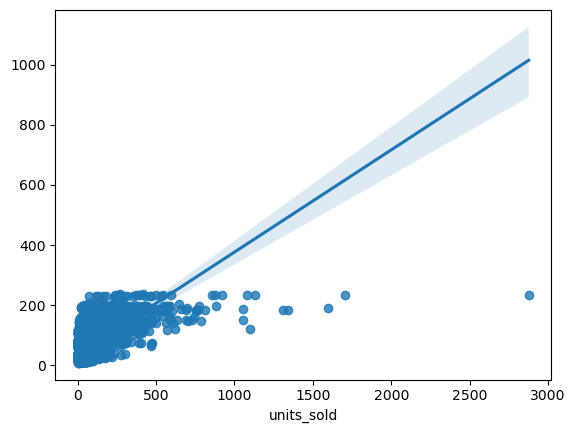

In [1068]:
sns.regplot(Y_test,Y_pred) #regression plot

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

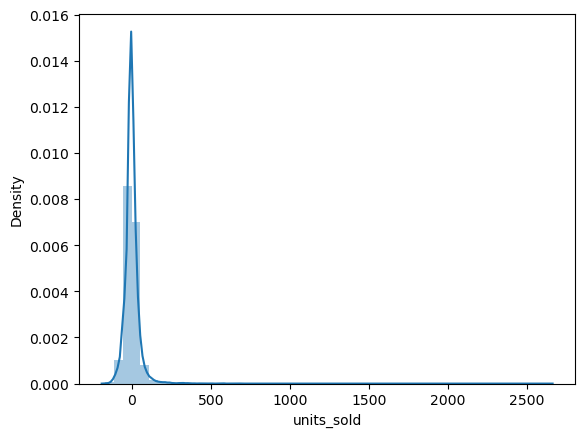

In [1069]:
sns.distplot(Y_test-Y_pred) #distribution plot